In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df['Contract'].nunique()

3

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df=df.drop_duplicates()

In [9]:
df=df.dropna()

In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df=df.drop(columns=['customerID'])

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_23156\266577964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [14]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_23156\2671210694.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)


In [15]:
num_cols = df.select_dtypes(include="number").columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]

    print(f"{col}: number of outliers = {len(outliers)}")

SeniorCitizen: number of outliers = 1142
tenure: number of outliers = 0
MonthlyCharges: number of outliers = 0
TotalCharges: number of outliers = 0


In [16]:
num_cols = df.select_dtypes(include="number").columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)

In [17]:
cols_internet_related = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for c in cols_internet_related:
    df[c] = df[c].replace({'No internet service':'No'})
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service':'No'})

In [18]:
contract_map = {"Month-to-month": 0, "One year": 1, "Two year": 2}
df["Contract_encoded"] = df["Contract"].map(contract_map)

In [19]:
df=df.drop(columns=["Contract"])

# Feature Engineering

In [20]:
##monthly charges average
df['AvgCharges'] = df.apply(lambda row: row['TotalCharges']/row['tenure']
                             if row['tenure']>0 else 0, axis=1)


In [21]:
df["clv"] = df["tenure"] * df["MonthlyCharges"]

In [22]:
# Loyalty Class حسب مدة الاشتراك
df["LoyaltyClass"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 36, df["tenure"].max()],
    labels=["New", "Mid", "Loyal"]
)

In [23]:
# Revenue Segment حسب المصروف الشهري
df["RevenueSegment"] = pd.qcut(df["MonthlyCharges"], 3, labels=["Low", "Medium", "High"])

In [24]:
#Is long term customer?
df['is_long_term'] = (df['tenure'] > 12).astype(int)

In [25]:
# عدد الخدمات المشترك فيها العميل
services = [
    "PhoneService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"
]
df["NumServices"] = df[services].apply(lambda row: sum(row == "Yes"), axis=1)

# Targets

In [26]:
#The Main Target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [27]:
# Target 2: Time to Churn
df["time_to_churn"] = df["tenure"] 

In [28]:
# Target 3: CLV Segmentation
df["clv_segment"] = pd.qcut(df["clv"], q=3, labels=["Low", "Medium", "High"]) #target num 3
clv_mapping = {"Low": 0, "Medium": 1, "High": 2}
df["clv_segment"] = df["clv_segment"].map(clv_mapping)

In [29]:
# Target 4: Risk Segment (placeholder until modeling)
#df["RiskSegment"] = "Unknown"  // This will be defined after modeling based on churn risk

In [30]:
import numpy as np
# Target 5: Campaign Response (synthetic)
def generate_campaign_response(row):
    # تحديد CLVSegment
    if row["clv_segment"] == 2:   # High
        prob = 0.35
    elif row["clv_segment"] == 1: # Medium
        prob = 0.25
    else:                         # Low
        prob = 0.15

    # Loyalty effect
    if row["is_long_term"]:
        prob += 0.10

    # Number of services
    prob += (row["NumServices"] * 0.02)

    # Cap probability
    prob = min(max(prob, 0), 0.90)

    return np.random.choice([0, 1], p=[1-prob, prob])

df["CampaignResponse"] = df.apply(generate_campaign_response, axis=1)




In [31]:
df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Contract_encoded',
       'AvgCharges', 'clv', 'LoyaltyClass', 'RevenueSegment', 'is_long_term',
       'NumServices', 'time_to_churn', 'clv_segment', 'CampaignResponse'],
      dtype='object')

# ENCODING

In [32]:
# Identify categorical columns
cat_cols = df.select_dtypes(include="object").columns.tolist()

cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod']

In [33]:
df= pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   SeniorCitizen                          7043 non-null   int64   
 1   tenure                                 7043 non-null   int64   
 2   MonthlyCharges                         7043 non-null   float64 
 3   TotalCharges                           7043 non-null   float64 
 4   Churn                                  7043 non-null   int64   
 5   Contract_encoded                       7043 non-null   int64   
 6   AvgCharges                             7043 non-null   float64 
 7   clv                                    7043 non-null   float64 
 8   LoyaltyClass                           7032 non-null   category
 9   RevenueSegment                         7043 non-null   category
 10  is_long_term                           7043 non-null   int64

In [35]:
df["LoyaltyClass"] = df["LoyaltyClass"].astype(str)
df["RevenueSegment"] = df["RevenueSegment"].astype(str)
df["clv_segment"] = df["clv_segment"].astype(str)
cat_cols = ["LoyaltyClass", "RevenueSegment", "clv_segment"]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)



In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   Contract_encoded                       7043 non-null   int64  
 6   AvgCharges                             7043 non-null   float64
 7   clv                                    7043 non-null   float64
 8   is_long_term                           7043 non-null   int64  
 9   NumServices                            7043 non-null   int64  
 10  time_to_churn                          7043 non-null   int64  
 11  Camp

In [37]:
bool_cols = df.select_dtypes(include="bool").columns
df[bool_cols] = df[bool_cols].astype(float)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   Contract_encoded                       7043 non-null   int64  
 6   AvgCharges                             7043 non-null   float64
 7   clv                                    7043 non-null   float64
 8   is_long_term                           7043 non-null   int64  
 9   NumServices                            7043 non-null   int64  
 10  time_to_churn                          7043 non-null   int64  
 11  Camp

In [39]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_encoded', 'AvgCharges', 'clv', 'is_long_term', 'NumServices',
       'time_to_churn', 'CampaignResponse', 'gender_Male', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'LoyaltyClass_Mid', 'LoyaltyClass_New', 'LoyaltyClass_nan',
       'RevenueSegment_Low', 'RevenueSegment_Medium', 'clv_segment_1',
       'clv_segment_2'],
      dtype='object')

In [40]:
df.shape

(7043, 36)

# Modeling

In [41]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)


(5634, 35) (1409, 35)


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#  LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

[[932 103]
 [177 197]]


In [44]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
classes=np.unique(y_train)
weights=compute_class_weight(class_weight='balanced',classes=classes,y=y_train)
class_weights=dict(zip(classes,weights))
print("class weight:",class_weights)

class weight: {np.int64(0): np.float64(0.6805991785455424), np.int64(1): np.float64(1.8842809364548494)}


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression مع class_weight
clf = LogisticRegression(
    class_weight=class_weights,
    max_iter=2000,
    C=0.1,
    solver="liblinear")

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

[[743 292]
 [ 81 293]]


In [46]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# clf = LogisticRegression(max_iter=1000, random_state=42)
# clf.fit(X_train_res, y_train_res)
# y_pred = clf.predict(X_test_scaled)
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))


# RandomForest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42,class_weight=class_weights)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [48]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [49]:
# تقييم الأداء
print("Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_rf))

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409

Confusion Matrix:

[[927 108]
 [199 175]]


In [50]:
# Feature importance
importances = rf.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nTop 10 Important Features:\n")
print(feature_importance_df.head)


Top 10 Important Features:

<bound method NDFrame.head of                                   Feature  Importance
2                          MonthlyCharges    0.099848
5                              AvgCharges    0.099435
6                                     clv    0.091456
3                            TotalCharges    0.090471
1                                  tenure    0.088014
9                           time_to_churn    0.080232
4                        Contract_encoded    0.080013
16            InternetService_Fiber optic    0.040351
26         PaymentMethod_Electronic check    0.027632
8                             NumServices    0.026647
24                   PaperlessBilling_Yes    0.020975
11                            gender_Male    0.018572
18                     OnlineSecurity_Yes    0.018155
17                     InternetService_No    0.017039
7                            is_long_term    0.015895
12                            Partner_Yes    0.015333
10                     

C:\Users\DELL\AppData\Local\Temp\ipykernel_23156\1784870062.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_feature_importance, palette='viridis')


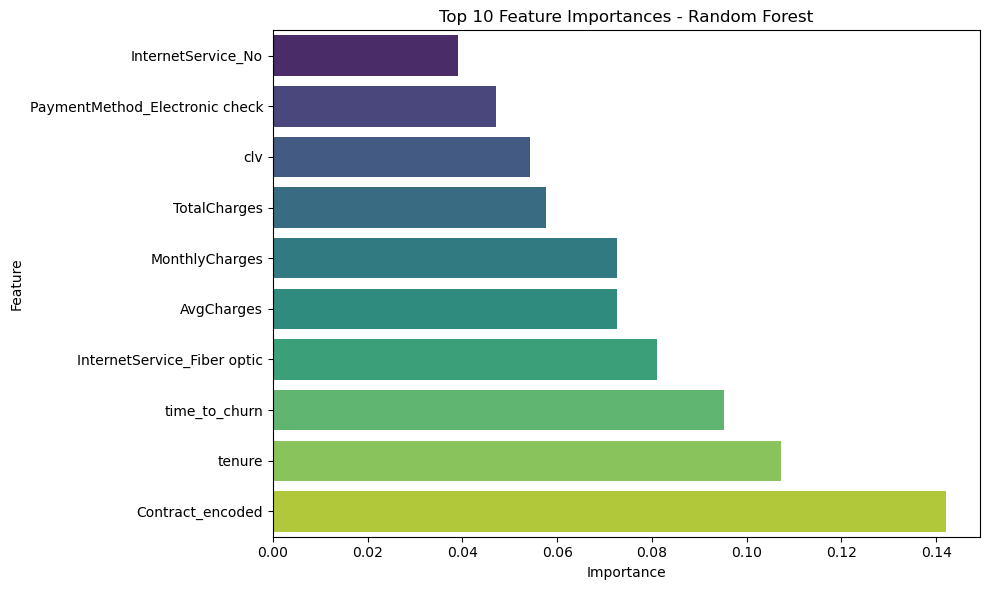

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# افترضنا إن df_feature_importance فيه الأعمدة 'Feature' و 'Importance'
df_feature_importance = pd.DataFrame({
    'Feature': ['Contract_encoded', 'tenure', 'time_to_churn', 'InternetService_Fiber optic', 
                'AvgCharges', 'MonthlyCharges', 'TotalCharges', 'clv', 
                'PaymentMethod_Electronic check', 'InternetService_No'],
    'Importance': [0.142145, 0.107281, 0.095254, 0.081113, 
                   0.072664, 0.072534, 0.057595, 0.054241, 0.047158, 0.038998]
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=True)


plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=df_feature_importance, palette='viridis')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

grid_search.best_params_
model = grid_search.best_estimator_

y_pred_knn = model.predict(X_test_scaled)


print("Classification Report:\n")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_knn))





Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1035
           1       0.57      0.53      0.55       374

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.76      0.77      0.77      1409

Confusion Matrix:

[[887 148]
 [177 197]]


# Stacking

In [53]:


from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [
    ('rf', RandomForestClassifier(n_estimators=150, max_depth=8, random_state=42,class_weight=class_weights)),
    ('logreg', LogisticRegression(max_iter=500)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

stack_model.fit(X_train_scaled, y_train)

y_prob = stack_model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_prob > 0.45).astype(int)


stack_predictions = stack_model.predict(X_test_scaled)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))




Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1035
           1       0.64      0.59      0.61       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409

Confusion Matrix:

[[908 127]
 [153 221]]


In [ ]:
#target 2 time to churn 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score

y_1 = df['time_to_churn']
X_1 = df.drop('time_to_churn', axis=1)


X_encoded = pd.get_dummies(X_1, drop_first=True)


for col in X_encoded.select_dtypes(include=['bool']).columns:
    X_encoded[col] = X_encoded[col].astype(int)


X_1train, X_1test, y_1train, y_1test = train_test_split(
    X_encoded, y_1, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_1train.shape[0]} samples with {X_1train.shape[1]} features.")



scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_1train)
X_test_nn = scaler.transform(X_1test)



model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) 
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.summary()


history = model.fit(
    X_train_nn, y_1train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


y_pred_nn = model.predict(X_test_nn).flatten()



mse_nn = mean_squared_error(y_1test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_1test, y_pred_nn)

print("\nNeural Network Performance:")
print("MSE:", mse_nn)
print("RMSE:", rmse_nn)
print("R²:", r2_nn)


Training set size: 5634 samples with 35 features.


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 450.5914 - mae: 13.2379 - val_loss: 22.4464 - val_mae: 3.5619
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 22.3859 - mae: 3.6289 - val_loss: 11.8651 - val_mae: 2.7107
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 16.0124 - mae: 3.1091 - val_loss: 8.2147 - val_mae: 2.2035
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 14.2260 - mae: 2.9508 - val_loss: 5.5207 - val_mae: 1.8233
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11.5564 - mae: 2.6726 - val_loss: 4.4979 - val_mae: 1.6910
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10.7313 - mae: 2.5448 - val_loss: 3.4578 - val_mae: 1.4536
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10.1012 - mae: 2.4577 - val_loss: 3.4332 - val_mae: 1.4285
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.3017 - mae: 2.3535 - val_loss: 3.2316 - val_mae: 1.4108
Epoch 9/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4m

In [ ]:
import joblib


model.save("nn_time_to_churn_model.h5")


joblib.dump(scaler, "scaler_time_to_churn.pkl")


joblib.dump(X_encoded.columns.tolist(), "feature_columns.pkl")

print("Model, scaler, and columns saved successfully.")


Model, scaler, and columns saved successfully.


In [ ]:
# 3 target clv


y_clv = df['clv']  
X_clv = df.drop('clv', axis=1)


X_clv_encoded = pd.get_dummies(X_clv, drop_first=True)

for col in X_clv_encoded.select_dtypes(include=['bool']).columns:
    X_clv_encoded[col] = X_clv_encoded[col].astype(int)


X_clv_train, X_clv_test, y_clv_train, y_clv_test = train_test_split(
    X_clv_encoded, y_clv, test_size=0.2, random_state=42
)


In [64]:
import xgboost as xgb

# Convert to DMatrix (faster for XGBoost)
dtrain_clv = xgb.DMatrix(X_clv_train, label=y_clv_train)
dtest_clv = xgb.DMatrix(X_clv_test, label=y_clv_test)

params_clv = {
    "objective": "reg:squarederror",
    "eta": 0.05,
    "max_depth": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "lambda": 1,
    "alpha": 0.1
}

xgb_clv_model = xgb.train(
    params=params_clv,
    dtrain=dtrain_clv,
    num_boost_round=500,
    evals=[(dtest_clv, "eval")],
    early_stopping_rounds=20,
    verbose_eval=False
)


In [66]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_clv_pred = xgb_clv_model.predict(dtest_clv)

mse_clv = mean_squared_error(y_clv_test, y_clv_pred)
rmse_clv = np.sqrt(mse_clv)
r2_clv = r2_score(y_clv_test, y_clv_pred)
accuracy_clv = r2_clv * 100
print("Accuracy (%):", accuracy_clv)


print("CLV XGBoost Performance:")
print("Accuracy (%):", accuracy_clv)
print("MSE:", mse_clv)
print("RMSE:", rmse_clv)
print("R²:", r2_clv)

Accuracy (%): 99.97514530150737
CLV XGBoost Performance:
Accuracy (%): 99.97514530150737
MSE: 1293.439948108238
RMSE: 35.964426147350636
R²: 0.9997514530150737


In [ ]:
#Target 4: Risk Segment (using the stacking model)
X_scaled = scaler.transform(X)

churn_prob = stack_model.predict_proba(X_scaled)[:, 1]
df["churn_probability"] = churn_prob

df["RiskSegment"] = pd.cut(
    churn_prob,
    bins=[0, 0.3, 0.6, 1],
    labels=["Low", "Medium", "High"]
)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

y_risk = df['RiskSegment']
X_features = df.drop(['RiskSegment', 'time_to_churn', 'churn_probability'], axis=1, errors='ignore')


X_encoded = pd.get_dummies(X_features, drop_first=True)



le = LabelEncoder()
y_encoded = le.fit_transform(y_risk)
target_names = le.classes_ 




X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]} samples.")

Training set size: 5634 samples.


In [ ]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, max_depth=8)),
    ('gbm', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    # SVC needs probability enabled for stacking and takes longer to train
    ('svc', SVC(kernel='linear', C=1.0, probability=True, random_state=42)) 
]


stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(solver='liblinear', multi_class='auto', random_state=42),
    cv=5, 
    n_jobs=-1
)



print("\nTraining Stacking Classifier...")
stack_model.fit(X_train_scaled, y_train)
print("Training Complete.")               


y_pred_stack = stack_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_stack)
class_report = classification_report(y_test, y_pred_stack, target_names=target_names)

print("\n--- Stacking Classifier Evaluation (Target: Risk Segment) ---")
print(f"Overall Accuracy: {accuracy:.4f}")
print("\nClassification Report (Precision, Recall, F1-Score per segment):\n", class_report)


Training Stacking Classifier...


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Complete.

--- Stacking Classifier Evaluation (Target: Risk Segment) ---
Overall Accuracy: 0.9610

Classification Report (Precision, Recall, F1-Score per segment):
               precision    recall  f1-score   support

        High       0.95      0.95      0.95       222
         Low       0.98      0.99      0.98       918
      Medium       0.91      0.88      0.90       269

    accuracy                           0.96      1409
   macro avg       0.95      0.94      0.94      1409
weighted avg       0.96      0.96      0.96      1409



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   SeniorCitizen                          7043 non-null   int64   
 1   tenure                                 7043 non-null   int64   
 2   MonthlyCharges                         7043 non-null   float64 
 3   TotalCharges                           7043 non-null   float64 
 4   Churn                                  7043 non-null   int64   
 5   Contract_encoded                       7043 non-null   int64   
 6   AvgCharges                             7043 non-null   float64 
 7   clv                                    7043 non-null   float64 
 8   is_long_term                           7043 non-null   int64   
 9   NumServices                            7043 non-null   int64   
 10  time_to_churn                          7043 non-null   int64

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE


sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)


model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),
    
    Dense(1, activation='sigmoid')  
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
)


es = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


history = model.fit(
    X_res, y_res,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=1
)


y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7502 - loss: 0.5015 - precision: 0.6856 - recall: 0.6166 - val_accuracy: 0.7615 - val_loss: 0.5617 - val_precision: 1.0000 - val_recall: 0.7615
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7759 - loss: 0.4700 - precision: 0.7053 - recall: 0.6911 - val_accuracy: 0.7609 - val_loss: 0.5501 - val_precision: 1.0000 - val_recall: 0.7609
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7813 - loss: 0.4586 - precision: 0.7207 - recall: 0.6806 - val_accuracy: 0.7772 - val_loss: 0.4875 - val_precision: 1.0000 - val_recall: 0.7772
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7924 - loss: 0.4525 - precision: 0.7276 - recall: 0.7133 - val_accuracy: 0.7295 - val_loss: 0.5746 - val_precision: 1.0000 - val_recall: 0.7295
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7881 - loss: 0.4503 - precision: 0.7298 - recall: 0.6907 - val_accuracy: 0.7627 - val_los

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# 1. Scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_scaled)
X_test_scaled = sc.transform(X_test_scaled)

# 2. GridSearch for best var_smoothing
params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid = GridSearchCV(GaussianNB(), params, cv=5, scoring='f1_macro')
grid.fit(X_train_scaled, y_train)

best_nb = grid.best_estimator_

# 3. Prediction
y_pred_nb = best_nb.predict(X_test_scaled)

print(best_nb)


GaussianNB(var_smoothing=1e-05)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusionmatrix = confusion_matrix(y_test, y_pred)

print(" naive_bayes Accuracy:", accuracy)
print(" naive_bayes Precision:", precision)
print(" naive_bayes Recall:", recall)
print(" naive_bayes F1 Score:", f1)

 naive_bayes Accuracy: 0.7430801987224982
 naive_bayes Precision: 0.771078320290794
 naive_bayes Recall: 0.7430801987224982
 naive_bayes F1 Score: 0.7524617964259872


In [ ]:
df.to_csv("Cleaned_Model_IBM_Telcom_Data.csv", index=False)

In [ ]:
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
with open('stack_model.pkl', 'wb') as file:
    pickle.dump(stack_model, file)